In [2]:
import NN
import numpy as np
import timeit
import itertools
import importlib

In [2]:
OcT = ['Ocean1', 'Ocean2', 'Ocean3', 'Ocean4']
Var_X1 = ['x', 'y', 'thermalDriving', 'halineDriving', 'iceDraft']
Var_X2 = ['x', 'y', 'temperatureYZ', 'salinityYZ', 'iceDraft']
Var_X_non_position = ['temperatureYZ', 'salinityYZ', 'iceDraft']

In [4]:
def Hyp_param_list(Ind, Max):
    List =['1', '4', '8','16', '32', '64', '96', '128']
    string = []
    Possible = List[min(6, 3 * Ind + int(Max)) :min(int(Max/ 1.5) + 3 + 2 * Ind, len(List))]
    if Ind == Max:
        return Possible
    else:
        Next = Hyp_param_list(Ind + 1, Max)
        return ['_'.join([j, i]) for i in Next for j in Possible]

In [7]:
li = []
for i in range(3):
    li.extend(Hyp_param_list(0, i))
li

['1', '4', '8', '4_32', '8_32', '8_64_96', '16_64_96', '8_64_128', '16_64_128']

In [18]:
def Verify_string_tuple(Seqs, extent):
    List = ['1', '4', '8','16', '32', '64', '96', '128', '256']
    seqsT = list(Seqs)
    Min = int(Seqs[0][0])
    for ind, seq in enumerate(Seqs):
        removed = 0
        int_list = [int(i) for i in seq]
        Max = int_list[0]
        for ints in int_list:
            if ints<Max:
                seqsT.remove(seq)
                removed = 1
                break
            else:
                Max = ints
        if extent >= 3 and removed == 0:
            if int_list.count(Min) < int(extent)/2 and int_list.count(Min)!=0:
                seqsT.remove(seq)
    return seqsT
            
def Hyp2(Extent):
    List = ['1', '4', '8','16', '32', '64', '96', '128', '256'] 
    li = List[min(Extent-1 + int(Extent/2), min(len(List)-2, len(List) - 3 + int(Extent/5))):Extent+3 + int(2/Extent)]
    permut = list(itertools.product(li, repeat = Extent))
    Seq = Verify_string_tuple(permut, Extent)
    return ['_'.join(i) for i in Seq]

In [21]:
Hyp2(6)

['128_128_128_128_128_128',
 '128_128_128_128_128_256',
 '128_128_128_128_256_256',
 '128_128_128_256_256_256',
 '256_256_256_256_256_256']

In [93]:
B = A[0]
C = [int(i) for i in B]

In [97]:
C.count(64)

5

In [29]:
li_poss = ['32', '64']
extent = 1
LI = li_poss
list(itertools.product(LI, repeat = 2))

[('32', '32'), ('32', '64'), ('64', '32'), ('64', '64')]

In [25]:
List = ['1', '4', '8','16', '32', '64', '96', '128'] 

In [27]:
List[1:5]

['4', '8', '16', '32']

In [4]:
List = ['1', '2', '4', '8', '16', '32', '64']

In [10]:
import NN
import os
import importlib
import glob
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle

In [11]:
OcT = ['Ocean1', 'Ocean2', 'Ocean3', 'Ocean4']

/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8


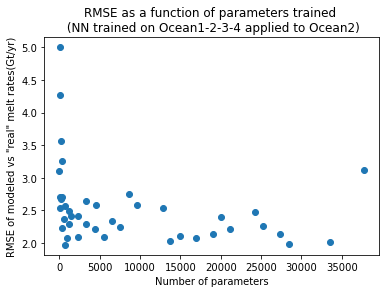

In [66]:
#def Compute_data_for_plotting(Epoch = 14, Ocean_trained = 'Ocean1', Type_trained = 'COM_NEMO-CNRS', 
#             Ocean_target = 'Ocean1', Type_tar = 'COM_NEMO-CNRS', message = 1):
importlib.reload(NN)
Rm, Param, Neur = NN.Plot_RMSE_to_param(Epoch = 8, Ocean_trained = OcT, message = 0, Ocean_target = 'Ocean2')

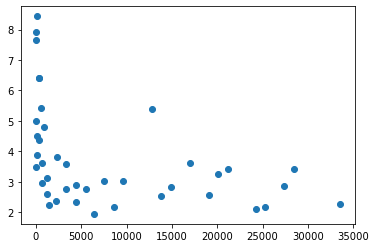

In [64]:
plt.scatter(Param, Rm)

In [16]:
Dataset = 'Ocean1'
Oc_mod_type = 'COM_NEMO-CNRS'
Bet_path = '/bettik/bouissob/'
D_path = os.path.join(Bet_path, 'Data', 'data_{}_{}.csv'.format(Dataset, Oc_mod_type))

In [19]:
Datasets = ['Ocean1', 'Ocean2', 'Ocean3', 'Ocean4']
li = []
for Dataset in Datasets:
    D_path = os.path.join(Bet_path, 'Data', 'data_{}_{}.csv'.format(Dataset, Oc_mod_type))
    li.append(pd.read_csv(D_path))
df = pd.concat(li, ignore_index= True)

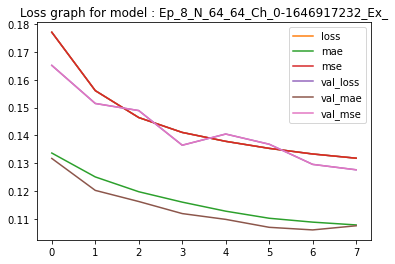

In [45]:
importlib.reload(NN)
NN.Plot_loss_model(ind = 0, Epoch = 8, Ocean = Datasets, Neur = '64_64') 

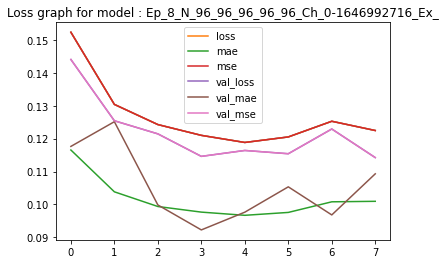

In [46]:
NN.Plot_loss_model(ind = 0, Epoch = 8, Ocean = Datasets, Neur = '96_96_96_96_96') 